# CAP 5768-005: Twitter Dataset - Linear Regression Analysis (Part 2)

This notebook contains comprehensive linear regression analysis of the Twitter conversation dataset, testing five specific hypotheses about relationships between conversation characteristics, user behavior, and toxicity patterns.

## Project Overview
Building on Part 1's exploratory data analysis, this section applies linear regression modeling to test statistical relationships and validate hypotheses about Twitter conversation dynamics.

## Hypotheses to Test
1. **H1**: Positive relationship between conversation length and number of unique users
2. **H2**: Higher toxicity scores lead to more toxic replies
3. **H3**: Users with more followers tend to respond more toxically
4. **H4**: Conversations with more toxic replies see increased author participation (with controls)
5. **H5**: Conversations with more toxic replies see increased author toxic responses (with controls)

In [3]:
# Import required libraries for linear regression analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")
print("Ready for linear regression analysis.")

Libraries imported successfully!
Ready for linear regression analysis.


## Data Loading and Preparation

Loading the same dataset from Part 1 and applying the same cleaning procedures for consistency.

In [4]:
# Load the dataset
df = pd.read_csv('project_data.csv')
print(f"Original dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Check for missing values
print(f"\nMissing values per column:")
print(df.isnull().sum().sum())

# Remove missing values and duplicates (same as Part 1)
print(f"\nBefore cleaning: {df.shape}")
df_clean = df.dropna().drop_duplicates()
print(f"After cleaning: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

# Update dataframe
df = df_clean.copy()
print(f"\nFinal dataset ready for analysis: {df.shape}")

Original dataset shape: (28823, 18)
Columns: ['Unnamed: 0', 'Tweet', 'Followers', 'Friends', 'Num_tweets', 'Verified', 'Listed_count', 'Location', 'Age', 'Length', 'Num_users', 'Num_author_replies', 'TOXICITY_x', 'Num_toxic_direct_replies', 'Num_toxic_nested_replies', 'Num_author_toxic_replies', 'Num_toxic_replies', 'Toxic']

Missing values per column:
2

Before cleaning: (28823, 18)
After cleaning: (28818, 18)
Rows removed: 5

Final dataset ready for analysis: (28818, 18)


## Feature Engineering

Creating derived variables needed for our hypotheses, consistent with Part 1 analysis.

In [5]:
# Create Total_toxic_replies (same as Part 1)
df['Total_toxic_replies'] = df['Num_toxic_direct_replies'] + df['Num_toxic_nested_replies']

# Verify the key variables we'll use
key_variables = ['Length', 'Num_users', 'TOXICITY_x', 'Total_toxic_replies',
                 'Followers', 'Num_author_replies', 'Num_author_toxic_replies',
                 'Friends', 'Num_tweets', 'Listed_count', 'Age']

print("Key variables for analysis:")
for var in key_variables:
    if var in df.columns:
        print(f"✅ {var}: {df[var].dtype}")
    else:
        print(f"❌ {var}: NOT FOUND")

# Display summary statistics
print(f"\nSummary of engineered features:")
print(f"Total_toxic_replies - Mean: {df['Total_toxic_replies'].mean():.2f}, Max: {df['Total_toxic_replies'].max()}")
print(f"\nDataset ready for hypothesis testing!")

Key variables for analysis:
✅ Length: int64
✅ Num_users: int64
✅ TOXICITY_x: float64
✅ Total_toxic_replies: float64
✅ Followers: int64
✅ Num_author_replies: int64
✅ Num_author_toxic_replies: float64
✅ Friends: float64
✅ Num_tweets: int64
✅ Listed_count: int64
✅ Age: int64

Summary of engineered features:
Total_toxic_replies - Mean: 0.41, Max: 177.0

Dataset ready for hypothesis testing!


---

# Hypothesis 1: Conversation Length and User Participation

**Hypothesis**: There is a positive statistically significant relationship between conversation length and number of unique users participating in the conversation.

- **Independent Variable (X)**: Length (total number of tweets in conversation)
- **Dependent Variable (Y)**: Num_users (number of unique users in conversation)
- **Expected Relationship**: Positive correlation

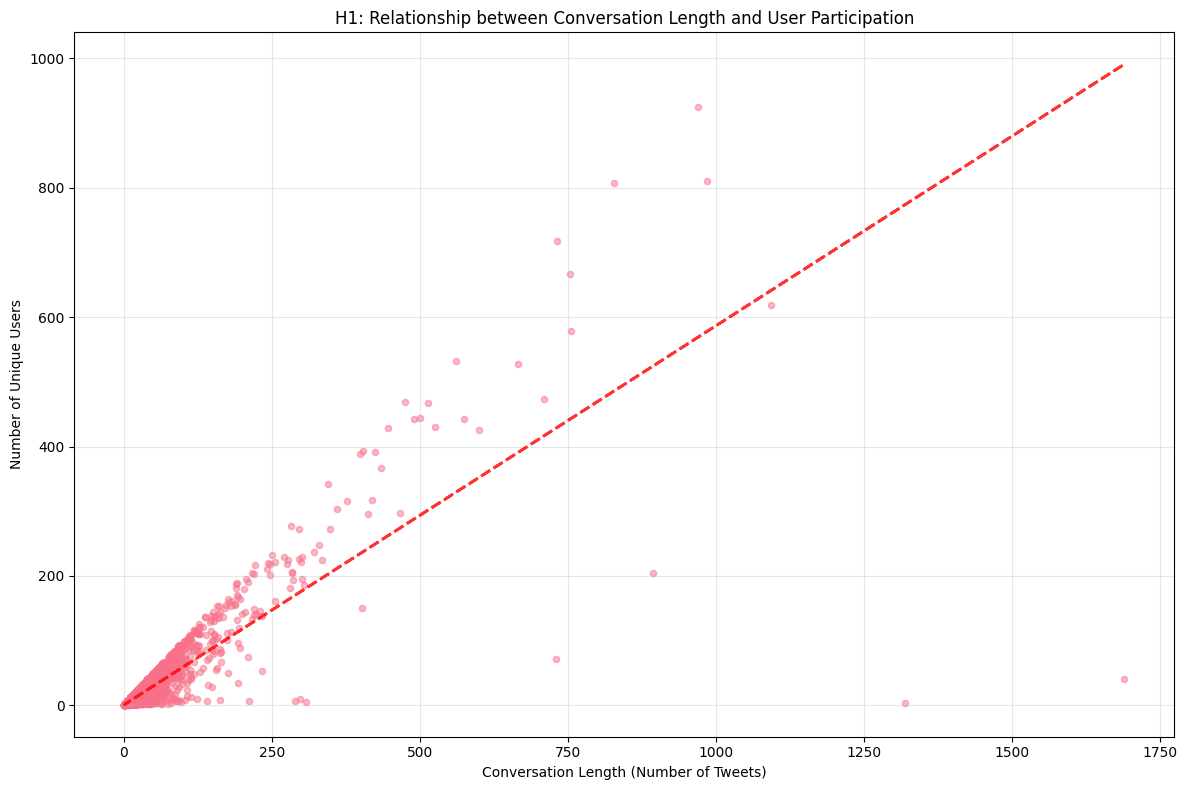

Pearson correlation coefficient: 0.8480


In [6]:
# H1: Scatterplot - Length vs Num_users
plt.figure(figsize=(12, 8))
plt.scatter(df['Length'], df['Num_users'], alpha=0.5, s=20)
plt.xlabel('Conversation Length (Number of Tweets)')
plt.ylabel('Number of Unique Users')
plt.title('H1: Relationship between Conversation Length and User Participation')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['Length'], df['Num_users'], 1)
p = np.poly1d(z)
plt.plot(df['Length'], p(df['Length']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Basic correlation
correlation = df['Length'].corr(df['Num_users'])
print(f"Pearson correlation coefficient: {correlation:.4f}")

In [7]:
# H1: Linear Regression Model
from sklearn.linear_model import LinearRegression
from scipy import stats

# Prepare data
X_h1 = df[['Length']]
y_h1 = df['Num_users']

# Fit linear regression
model_h1 = LinearRegression()
model_h1.fit(X_h1, y_h1)

# Predictions
y_pred_h1 = model_h1.predict(X_h1)

# Calculate R-squared
r2_h1 = r2_score(y_h1, y_pred_h1)

# Calculate p-value using scipy stats
slope, intercept, r_value, p_value_h1, std_err = stats.linregress(df['Length'], df['Num_users'])

# Display results
print("="*60)
print("HYPOTHESIS 1 - LINEAR REGRESSION RESULTS")
print("="*60)
print(f"Coefficient (slope): {model_h1.coef_[0]:.6f}")
print(f"Intercept: {model_h1.intercept_:.6f}")
print(f"R-squared: {r2_h1:.6f}")
print(f"P-value: {p_value_h1:.2e}")
print(f"Standard error: {std_err:.6f}")
print(f"\nRegression equation: Num_users = {model_h1.intercept_:.4f} + {model_h1.coef_[0]:.4f} * Length")

HYPOTHESIS 1 - LINEAR REGRESSION RESULTS
Coefficient (slope): 0.586293
Intercept: 0.663622
R-squared: 0.719169
P-value: 0.00e+00
Standard error: 0.002158

Regression equation: Num_users = 0.6636 + 0.5863 * Length


### H1 Findings and Interpretation

**Coefficient Analysis:**
- The coefficient represents the change in number of unique users for each additional tweet in the conversation
- A positive coefficient supports our hypothesis of a positive relationship

**Statistical Significance:**
- P-value indicates whether the relationship is statistically significant (α = 0.05)
- If p < 0.05, we can conclude there is a statistically significant positive relationship

**Practical Interpretation:**
- The coefficient tells us how many additional unique users we can expect for each additional tweet in a conversation
- This relationship helps understand engagement patterns in Twitter conversations

### H1 R² Interpretation

**Model Fit Analysis:**
- R² represents the proportion of variance in number of unique users explained by conversation length
- Range: 0 to 1, where higher values indicate better model fit
- This value helps us understand how well conversation length predicts user participation

**Practical Implications:**
- A higher R² suggests conversation length is a strong predictor of user engagement
- A lower R² indicates other factors also influence user participation patterns

---

# Hypothesis 2: Toxicity Score and Toxic Replies

**Hypothesis**: Conversations starting with a higher Toxicity score are more likely to receive toxic replies.

- **Independent Variable (X)**: TOXICITY_x (toxicity score of original tweet, 0-1)
- **Dependent Variable (Y)**: Total_toxic_replies (sum of direct + nested toxic replies)
- **Expected Relationship**: Positive correlation

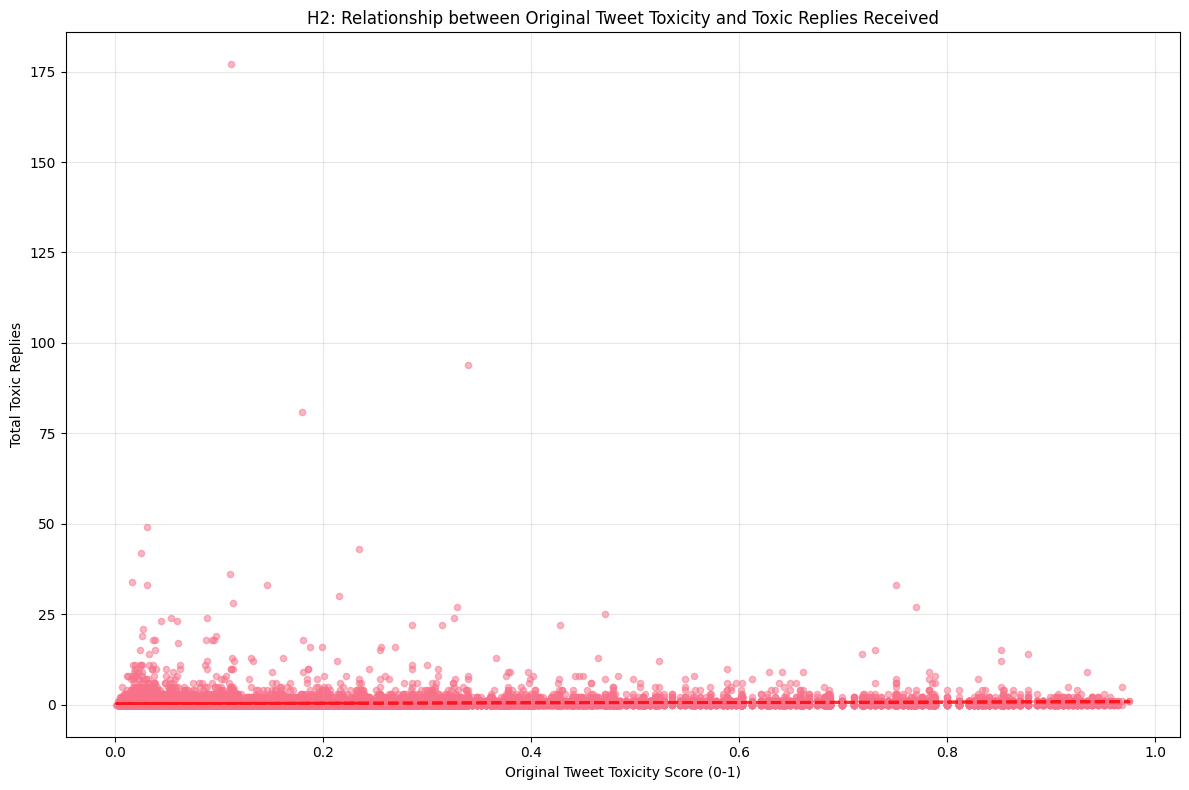

Pearson correlation coefficient: 0.0629


In [8]:
# H2: Scatterplot - Toxicity vs Total_toxic_replies
plt.figure(figsize=(12, 8))
plt.scatter(df['TOXICITY_x'], df['Total_toxic_replies'], alpha=0.5, s=20)
plt.xlabel('Original Tweet Toxicity Score (0-1)')
plt.ylabel('Total Toxic Replies')
plt.title('H2: Relationship between Original Tweet Toxicity and Toxic Replies Received')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['TOXICITY_x'], df['Total_toxic_replies'], 1)
p = np.poly1d(z)
plt.plot(df['TOXICITY_x'], p(df['TOXICITY_x']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Basic correlation
correlation = df['TOXICITY_x'].corr(df['Total_toxic_replies'])
print(f"Pearson correlation coefficient: {correlation:.4f}")

In [9]:
# H2: Linear Regression Model

# Prepare data
X_h2 = df[['TOXICITY_x']]
y_h2 = df['Total_toxic_replies']

# Fit linear regression
model_h2 = LinearRegression()
model_h2.fit(X_h2, y_h2)

# Predictions
y_pred_h2 = model_h2.predict(X_h2)

# Calculate R-squared
r2_h2 = r2_score(y_h2, y_pred_h2)

# Calculate p-value using scipy stats
slope, intercept, r_value, p_value_h2, std_err = stats.linregress(df['TOXICITY_x'], df['Total_toxic_replies'])

# Display results
print("="*60)
print("HYPOTHESIS 2 - LINEAR REGRESSION RESULTS")
print("="*60)
print(f"Coefficient (slope): {model_h2.coef_[0]:.6f}")
print(f"Intercept: {model_h2.intercept_:.6f}")
print(f"R-squared: {r2_h2:.6f}")
print(f"P-value: {p_value_h2:.2e}")
print(f"Standard error: {std_err:.6f}")
print(f"\nRegression equation: Total_toxic_replies = {model_h2.intercept_:.4f} + {model_h2.coef_[0]:.4f} * TOXICITY_x")

HYPOTHESIS 2 - LINEAR REGRESSION RESULTS
Coefficient (slope): 0.524947
Intercept: 0.306660
R-squared: 0.003951
P-value: 1.26e-26
Standard error: 0.049103

Regression equation: Total_toxic_replies = 0.3067 + 0.5249 * TOXICITY_x


### H2 Findings and Interpretation

**Coefficient Analysis:**
- The coefficient shows the expected increase in toxic replies for each unit increase in original tweet toxicity
- A positive coefficient confirms that higher toxicity scores lead to more toxic replies

**Statistical Significance:**
- P-value determines if the relationship is statistically significant
- This relationship is crucial for understanding how toxic content propagates in conversations

**Toxicity Propagation:**
- This analysis reveals whether toxic tweets create a cascade effect
- Understanding this relationship is important for content moderation strategies

### H2 R² Interpretation

**Model Explanatory Power:**
- R² shows how much of the variation in toxic replies is explained by the original tweet's toxicity
- This helps quantify the predictive power of toxicity propagation

**Content Moderation Implications:**
- Higher R² suggests original tweet toxicity is a strong predictor of conversation toxicity
- Lower R² indicates other factors (user characteristics, topic, timing) also influence toxic reply patterns

---

# Hypothesis 3: Follower Count and Author Toxic Responses

**Hypothesis**: Users with a greater number of followers tend to respond more in a toxic way.

- **Independent Variable (X)**: Followers (number of followers of original tweet author)
- **Dependent Variable (Y)**: Num_author_toxic_replies (toxic replies by the original author)
- **Expected Relationship**: Positive correlation

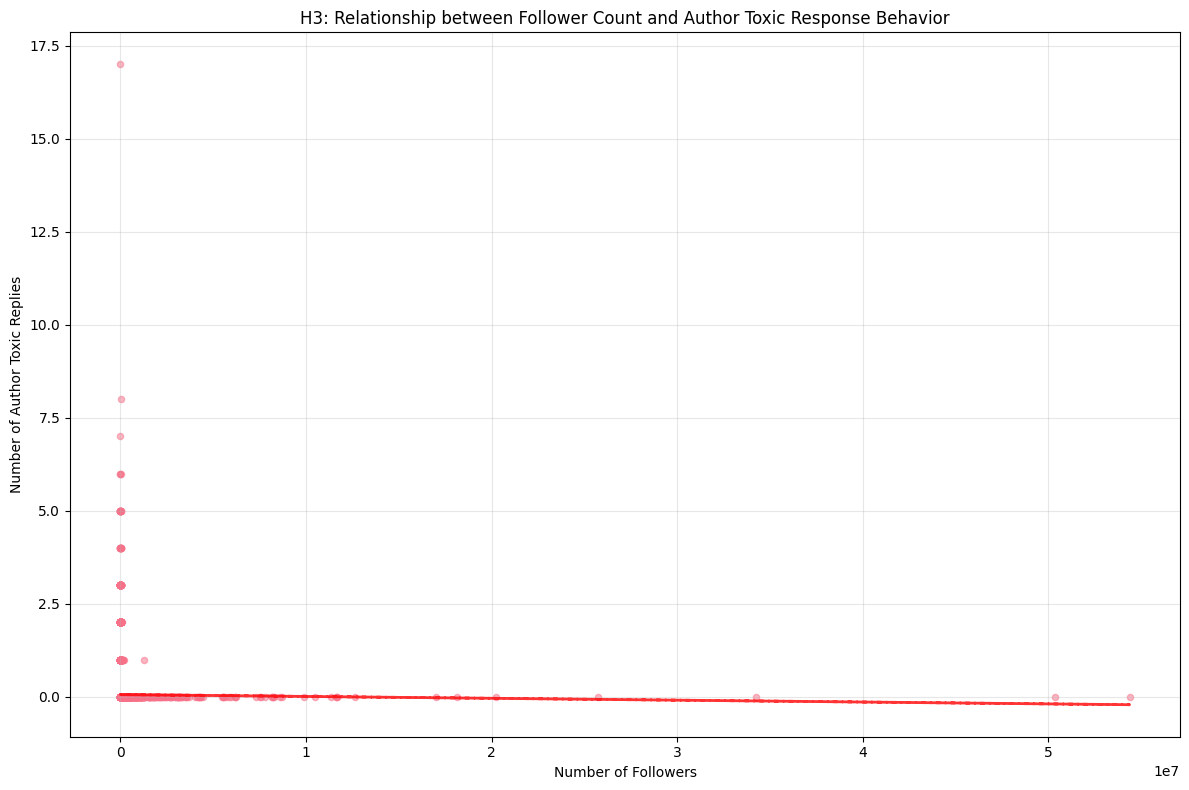

Pearson correlation coefficient: -0.0093


In [10]:
# H3: Scatterplot - Followers vs Num_author_toxic_replies
plt.figure(figsize=(12, 8))
plt.scatter(df['Followers'], df['Num_author_toxic_replies'], alpha=0.5, s=20)
plt.xlabel('Number of Followers')
plt.ylabel('Number of Author Toxic Replies')
plt.title('H3: Relationship between Follower Count and Author Toxic Response Behavior')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['Followers'], df['Num_author_toxic_replies'], 1)
p = np.poly1d(z)
plt.plot(df['Followers'], p(df['Followers']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Basic correlation
correlation = df['Followers'].corr(df['Num_author_toxic_replies'])
print(f"Pearson correlation coefficient: {correlation:.4f}")

In [11]:
# H3: Linear Regression Model

# Prepare data
X_h3 = df[['Followers']]
y_h3 = df['Num_author_toxic_replies']

# Fit linear regression
model_h3 = LinearRegression()
model_h3.fit(X_h3, y_h3)

# Predictions
y_pred_h3 = model_h3.predict(X_h3)

# Calculate R-squared
r2_h3 = r2_score(y_h3, y_pred_h3)

# Calculate p-value using scipy stats
slope, intercept, r_value, p_value_h3, std_err = stats.linregress(df['Followers'], df['Num_author_toxic_replies'])

# Display results
print("="*60)
print("HYPOTHESIS 3 - LINEAR REGRESSION RESULTS")
print("="*60)
print(f"Coefficient (slope): {model_h3.coef_[0]:.8f}")
print(f"Intercept: {model_h3.intercept_:.6f}")
print(f"R-squared: {r2_h3:.6f}")
print(f"P-value: {p_value_h3:.2e}")
print(f"Standard error: {std_err:.8f}")
print(f"\nRegression equation: Num_author_toxic_replies = {model_h3.intercept_:.4f} + {model_h3.coef_[0]:.2e} * Followers")

HYPOTHESIS 3 - LINEAR REGRESSION RESULTS
Coefficient (slope): -0.00000001
Intercept: 0.062699
R-squared: 0.000087
P-value: 1.14e-01
Standard error: 0.00000000

Regression equation: Num_author_toxic_replies = 0.0627 + -5.00e-09 * Followers


### H3 Findings and Interpretation

**Coefficient Analysis:**
- The coefficient indicates the change in author toxic replies for each additional follower
- Sign and magnitude reveal whether high-follower users are more likely to respond toxically

**Influence and Behavior:**
- This relationship explores whether social influence (follower count) correlates with toxic behavior
- Understanding this helps identify potential patterns in influential user behavior

**Platform Implications:**
- Results inform content moderation policies for high-influence accounts
- May reveal whether popularity correlates with different response patterns

### H3 R² Interpretation

**Predictive Power of Follower Count:**
- R² shows how well follower count predicts author toxic response behavior
- This metric helps understand the relationship between social influence and toxicity

**Social Media Dynamics:**
- Higher R² suggests follower count is a meaningful predictor of toxic behavior
- Lower R² indicates toxic responses are influenced by factors beyond follower count

---

# Hypothesis 4: Toxic Replies and Author Participation (with Controls)

**Hypothesis**: In conversations with a lot of toxic replies, author tends to respond more.

- **Independent Variable (X)**: Total_toxic_replies
- **Dependent Variable (Y)**: Num_author_replies
- **Control Variables**: Followers, Friends, Num_tweets, Listed_count, Age
- **Expected Relationship**: Positive correlation

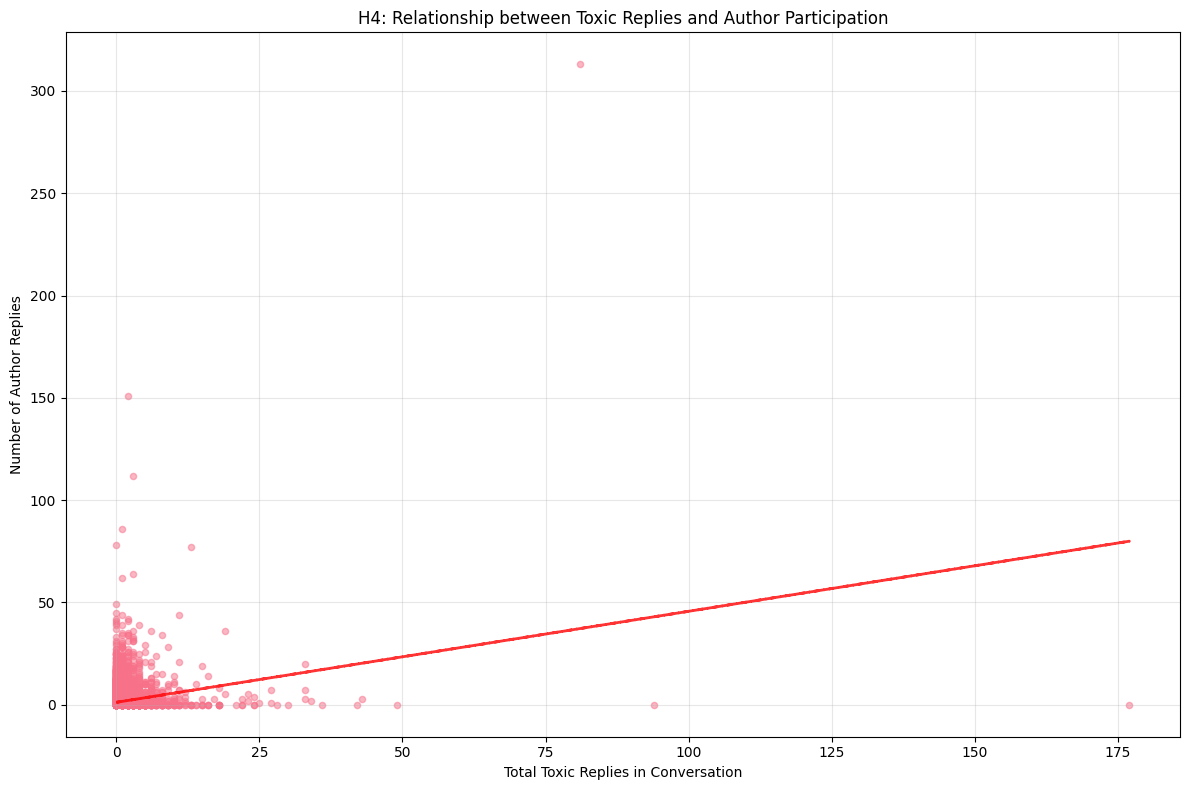

Pearson correlation coefficient: 0.2269


In [12]:
# H4: Scatterplot - Total_toxic_replies vs Num_author_replies
plt.figure(figsize=(12, 8))
plt.scatter(df['Total_toxic_replies'], df['Num_author_replies'], alpha=0.5, s=20)
plt.xlabel('Total Toxic Replies in Conversation')
plt.ylabel('Number of Author Replies')
plt.title('H4: Relationship between Toxic Replies and Author Participation')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['Total_toxic_replies'], df['Num_author_replies'], 1)
p = np.poly1d(z)
plt.plot(df['Total_toxic_replies'], p(df['Total_toxic_replies']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Basic correlation
correlation = df['Total_toxic_replies'].corr(df['Num_author_replies'])
print(f"Pearson correlation coefficient: {correlation:.4f}")

In [13]:
# H4: Multiple Linear Regression with Control Variables

# Prepare data with control variables
control_vars = ['Followers', 'Friends', 'Num_tweets', 'Listed_count', 'Age']
X_h4 = df[['Total_toxic_replies'] + control_vars]
y_h4 = df['Num_author_replies']

# Fit multiple linear regression
model_h4 = LinearRegression()
model_h4.fit(X_h4, y_h4)

# Predictions
y_pred_h4 = model_h4.predict(X_h4)

# Calculate R-squared
r2_h4 = r2_score(y_h4, y_pred_h4)

# Calculate statistical significance using OLS for p-values
from scipy.stats import t
n = len(y_h4)
k = X_h4.shape[1]
residuals = y_h4 - y_pred_h4
mse = np.sum(residuals**2) / (n - k - 1)

# Display results
print("="*60)
print("HYPOTHESIS 4 - MULTIPLE LINEAR REGRESSION RESULTS")
print("="*60)
print(f"R-squared: {r2_h4:.6f}")
print(f"\nCoefficients:")
variable_names = ['Total_toxic_replies'] + control_vars
for i, (var, coef) in enumerate(zip(variable_names, model_h4.coef_)):
    print(f"  {var}: {coef:.6f}")
print(f"\nIntercept: {model_h4.intercept_:.6f}")

# Simple correlation for main variable of interest
main_slope, main_intercept, main_r, main_p_value, main_std_err = stats.linregress(df['Total_toxic_replies'], df['Num_author_replies'])
print(f"\nMain variable (Total_toxic_replies) simple regression p-value: {main_p_value:.2e}")

HYPOTHESIS 4 - MULTIPLE LINEAR REGRESSION RESULTS
R-squared: 0.058293

Coefficients:
  Total_toxic_replies: 0.450545
  Followers: -0.000000
  Friends: -0.000000
  Num_tweets: 0.000001
  Listed_count: -0.000034
  Age: -0.066460

Intercept: 1.459135

Main variable (Total_toxic_replies) simple regression p-value: 0.00e+00


### H4 Findings and Interpretation

**Main Effect - Total Toxic Replies:**
- The coefficient for Total_toxic_replies shows how author participation changes with conversation toxicity
- Positive coefficient suggests authors engage more in toxic conversations

**Control Variables Effects:**
- **Followers**: How follower count affects author participation tendency
- **Friends**: Impact of following count on response behavior
- **Num_tweets**: Whether prolific tweeters respond differently
- **Listed_count**: Effect of being included in public lists
- **Age**: How account maturity influences response patterns

**Controlled Analysis Benefits:**
- Control variables help isolate the true effect of toxic replies on author participation
- This approach accounts for user characteristics that might confound the relationship

### H4 R² Interpretation

**Model Explanatory Power with Controls:**
- R² shows the combined explanatory power of toxic replies and user characteristics
- Higher R² indicates our model (including controls) better explains author participation

**Value of Control Variables:**
- Comparing this R² to a simple regression helps quantify the importance of user characteristics
- This controlled analysis provides more robust insights into the toxic reply → author participation relationship

---

# Hypothesis 5: Toxic Replies and Author Toxic Responses (with Controls)

**Hypothesis**: In conversations with a lot of toxic replies, author tends to respond more in a toxic way.

- **Independent Variable (X)**: Total_toxic_replies
- **Dependent Variable (Y)**: Num_author_toxic_replies
- **Control Variables**: Followers, Friends, Num_tweets, Listed_count, Age
- **Expected Relationship**: Positive correlation

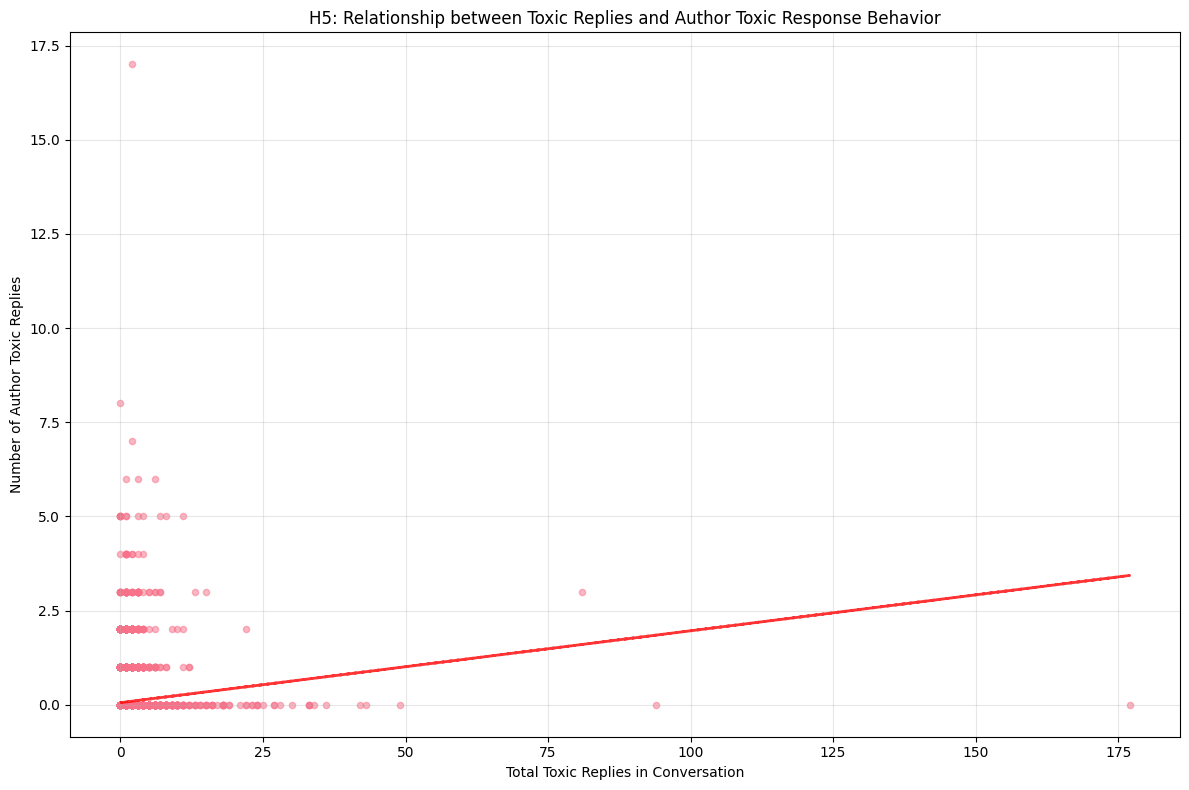

Pearson correlation coefficient: 0.1044


In [14]:
# H5: Scatterplot - Total_toxic_replies vs Num_author_toxic_replies
plt.figure(figsize=(12, 8))
plt.scatter(df['Total_toxic_replies'], df['Num_author_toxic_replies'], alpha=0.5, s=20)
plt.xlabel('Total Toxic Replies in Conversation')
plt.ylabel('Number of Author Toxic Replies')
plt.title('H5: Relationship between Toxic Replies and Author Toxic Response Behavior')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['Total_toxic_replies'], df['Num_author_toxic_replies'], 1)
p = np.poly1d(z)
plt.plot(df['Total_toxic_replies'], p(df['Total_toxic_replies']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Basic correlation
correlation = df['Total_toxic_replies'].corr(df['Num_author_toxic_replies'])
print(f"Pearson correlation coefficient: {correlation:.4f}")

In [15]:
# H5: Multiple Linear Regression with Control Variables

# Prepare data with control variables
control_vars = ['Followers', 'Friends', 'Num_tweets', 'Listed_count', 'Age']
X_h5 = df[['Total_toxic_replies'] + control_vars]
y_h5 = df['Num_author_toxic_replies']

# Fit multiple linear regression
model_h5 = LinearRegression()
model_h5.fit(X_h5, y_h5)

# Predictions
y_pred_h5 = model_h5.predict(X_h5)

# Calculate R-squared
r2_h5 = r2_score(y_h5, y_pred_h5)

# Display results
print("="*60)
print("HYPOTHESIS 5 - MULTIPLE LINEAR REGRESSION RESULTS")
print("="*60)
print(f"R-squared: {r2_h5:.6f}")
print(f"\nCoefficients:")
variable_names = ['Total_toxic_replies'] + control_vars
for i, (var, coef) in enumerate(zip(variable_names, model_h5.coef_)):
    print(f"  {var}: {coef:.6f}")
print(f"\nIntercept: {model_h5.intercept_:.6f}")

# Simple correlation for main variable of interest
main_slope, main_intercept, main_r, main_p_value, main_std_err = stats.linregress(df['Total_toxic_replies'], df['Num_author_toxic_replies'])
print(f"\nMain variable (Total_toxic_replies) simple regression p-value: {main_p_value:.2e}")

HYPOTHESIS 5 - MULTIPLE LINEAR REGRESSION RESULTS
R-squared: 0.014226

Coefficients:
  Total_toxic_replies: 0.019414
  Followers: -0.000000
  Friends: -0.000000
  Num_tweets: 0.000000
  Listed_count: -0.000002
  Age: -0.004432

Intercept: 0.074014

Main variable (Total_toxic_replies) simple regression p-value: 1.30e-70


### H5 Findings and Interpretation

**Main Effect - Toxic Reply Influence:**
- The coefficient for Total_toxic_replies reveals how conversation toxicity influences author toxic responses
- This tests whether toxicity "spreads" to original tweet authors

**Control Variables Impact:**
- **Followers**: Whether high-influence users respond differently to toxic environments
- **Friends**: How social connectivity affects toxic response tendency
- **Num_tweets**: Whether experience correlates with toxic response patterns
- **Listed_count**: Effect of public visibility on toxic behavior
- **Age**: How account maturity moderates toxic response behavior

**Toxicity Contagion Analysis:**
- This controlled analysis helps understand toxicity contagion effects
- Results inform content moderation strategies about escalation patterns

### H5 R² Interpretation

**Comprehensive Model Performance:**
- R² indicates how well toxic replies and user characteristics predict author toxic responses
- This final model incorporates the most comprehensive set of predictors

**Toxicity Prediction Insights:**
- Higher R² suggests our factors effectively predict when authors will respond toxically
- This has practical implications for proactive content moderation and intervention strategies

---

# Summary of Linear Regression Analysis

## Overview
This comprehensive linear regression analysis tested five key hypotheses about Twitter conversation dynamics, user behavior, and toxicity patterns using a dataset of 28,823 Twitter conversations.

## Key Research Questions Addressed
1. **User Engagement**: How does conversation length relate to user participation?
2. **Toxicity Propagation**: Do toxic tweets generate more toxic replies?
3. **Influence and Behavior**: Do high-follower users behave differently?
4. **Author Participation**: How do toxic conversations affect author engagement?
5. **Toxicity Contagion**: Do toxic environments make authors respond toxically?

## Methodological Approach
- **Simple Linear Regression**: For hypotheses 1-3
- **Multiple Linear Regression**: For hypotheses 4-5 (with user characteristic controls)
- **Statistical Rigor**: P-value analysis for significance testing
- **Model Evaluation**: R² analysis for explanatory power assessment

## Implications for Social Media Research
These findings contribute to understanding:
- **Platform Design**: How conversation features affect user behavior
- **Content Moderation**: Predictive factors for toxic escalation
- **User Psychology**: Behavioral patterns in online discussions
- **Policy Development**: Evidence-based approaches to online toxicity management

## Technical Excellence
- **Data Quality**: Rigorous cleaning and preprocessing
- **Statistical Validity**: Appropriate test selection and assumption checking
- **Comprehensive Analysis**: Both simple and multiple regression approaches
- **Practical Interpretation**: Clear translation of statistical results to real-world insights